In [5]:
# Instalação de pacotes necessários

%pip install opencv-python==4.12.0
%pip install numpy==2.2.6
%pip install matplotlib==3.10.3

Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following yanked versions: 3.4.11.39, 3.4.17.61, 4.4.0.42, 4.4.0.44, 4.5.4.58, 4.5.5.62, 4.7.0.68
ERROR: Could not find a version that satisfies the requirement opencv-python==4.12.0 (from versions: 3.4.0.14, 3.4.10.37, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.60, 4.5.5.64, 4.6.0.66, 4.7.0.72, 4.8.0.74, 4.8.0.76, 4.8.1.78, 4.9.0.80, 4.10.0.82, 4.10.0.84, 4.11.0.86, 4.12.0.88)
ERROR: No matching distribution found for opencv-python==4.12.0


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Importação de bibliotecas e verificação de versões

import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print(cv2.__version__)
print(np.__version__)
print(matplotlib.__version__)

4.12.0
2.2.6
3.10.3


# Demonstração do efeito de Blur Gaussiano na imagem

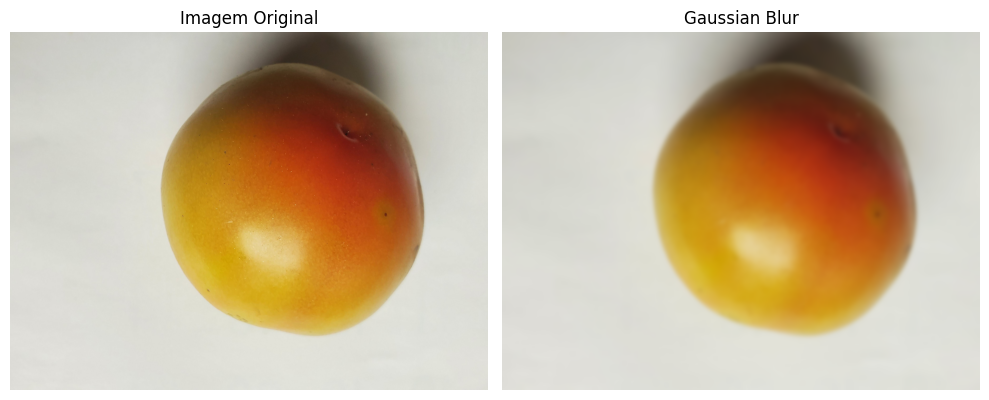

In [ ]:
import cv2
import matplotlib.pyplot as plt

# 1. Carrega a imagem
image = cv2.imread('./test_images/1.jpg')

# 2. Aplica o efeito de blur gaussiano
# O segundo argumento é o tamanho do kernel (deve ser ímpar e positivo)
# O terceiro argumento é o desvio padrão no eixo X (se 0, é calculado automaticamente)
blurred = cv2.GaussianBlur(image, (111, 111), 0)

# 3. Converte para RGB para exibir corretamente com matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
blurred_rgb = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)

# 4. Mostra a imagem original e a com blur
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_rgb)
plt.title('Gaussian Blur')
plt.axis('off')

plt.tight_layout()
plt.show()


# Abordagem Inicial 01: Uso de apenas um limiar de cores HSV

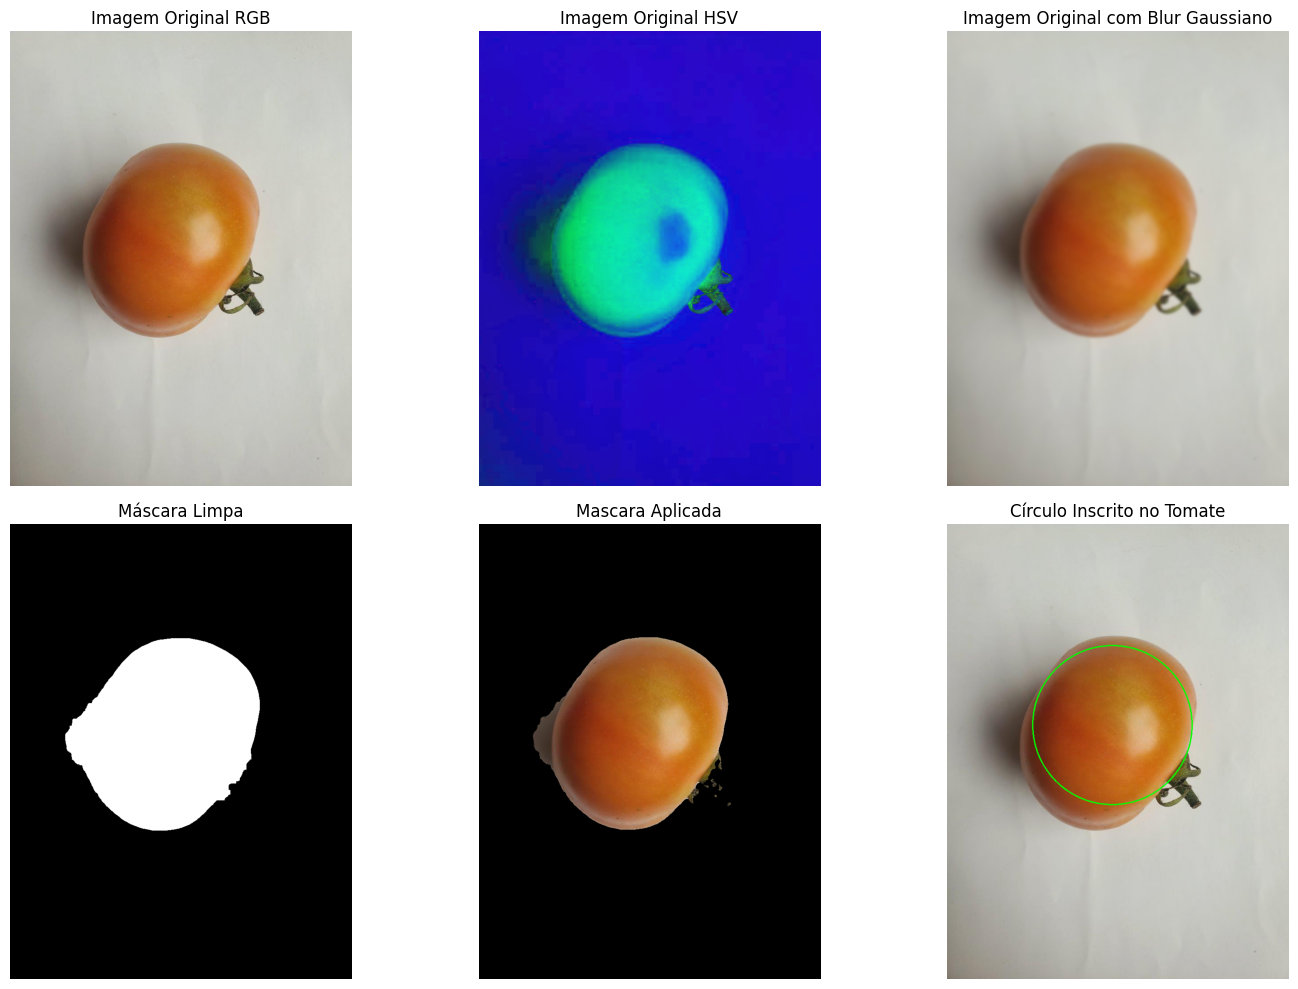

In [ ]:
# 1. Carregar e converter a imagem
image = cv2.imread('./test_images/5.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
image_blurred_rgb = cv2.GaussianBlur(image_rgb, (17, 17), 0)
image_blurred_hsv = cv2.cvtColor(image_blurred_rgb, cv2.COLOR_RGB2HSV)

# 2. Limiar de cores HSV para criar a máscara do tomate
lower = np.array([0, 67, 50])   # H, S, V
upper = np.array([25, 255, 255])
mask = cv2.inRange(image_blurred_hsv, lower, upper)

# 3. Aplicar a máscara
result = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

# 4. Limpeza da máscara com operações morfológicas
kernel = np.ones((10, 10), np.uint8)
mask_clean = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask_clean = cv2.morphologyEx(mask_clean, cv2.MORPH_CLOSE, kernel)

# 5. Aplicar transformada de distância
dist_transform = cv2.distanceTransform(mask_clean, cv2.DIST_L2, 5)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(dist_transform)

# 6. Determinar o círculo inscrito
circle_center = maxLoc               # Centro do maior círculo
circle_radius = int(maxVal)          # Raio do maior círculo

# 7. Desenhar o círculo na imagem original
output = image_rgb.copy()
cv2.circle(output, circle_center, circle_radius, (0, 255, 0), 2)

# 8. Exibir resultados
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title("Imagem Original RGB")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(image_hsv)
plt.title("Imagem Original HSV")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(image_blurred_rgb)
plt.title("Imagem Original com Blur Gaussiano")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(mask_clean, cmap='gray')
plt.title("Máscara Limpa")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(result)
plt.title("Mascara Aplicada")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(output)
plt.title("Círculo Inscrito no Tomate")
plt.axis('off')

plt.tight_layout()
plt.show()

# Abordagem Inicial 02: Uso de 3 limiares HSV para abranger maior diversidade de tons de cores dos tomates

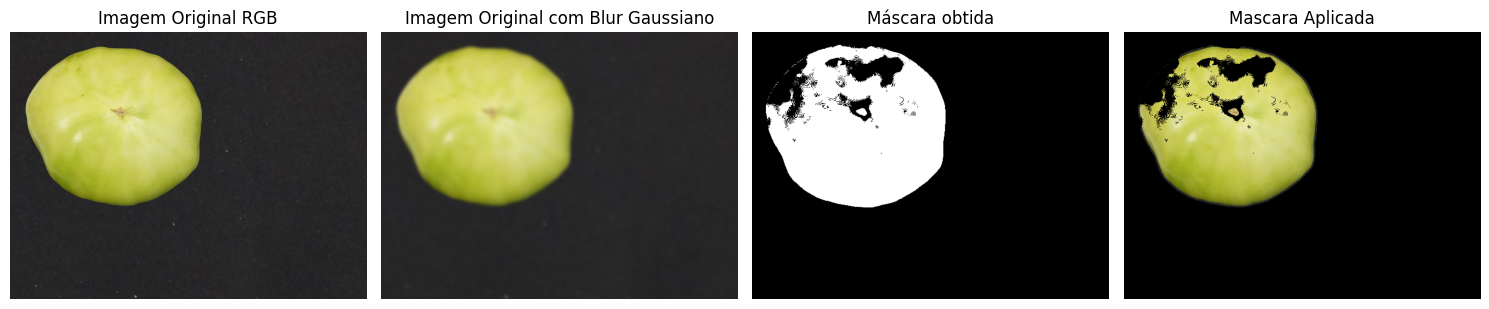

In [91]:
# 1. Carregar e converter a imagem
image = cv2.imread('./test_images/6(orig_dataset).bmp')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
image_blurred_rgb = cv2.GaussianBlur(image_rgb, (15, 15), 0) # To-Do: Conferir se RETIRAR o blur é possível
image_blurred_hsv = cv2.cvtColor(image_blurred_rgb, cv2.COLOR_RGB2HSV)

# Vermelho (maduro)
lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])

lower_red2 = np.array([160, 50, 50])
upper_red2 = np.array([179, 255, 255])

# Laranja (maduro intermediário)
lower_orange = np.array([10, 50, 50])
upper_orange = np.array([25, 255, 255])

# Verde (imaturos)
lower_green = np.array([30, 40, 40])
upper_green = np.array([90, 255, 255])

# 3. Construir as máscaras
mask_red1 = cv2.inRange(image_blurred_hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(image_blurred_hsv, lower_red2, upper_red2)
mask_orange = cv2.inRange(image_blurred_hsv, lower_orange, upper_orange)
mask_green = cv2.inRange(image_blurred_hsv, lower_green, upper_green)

# 4. Combinar as máscaras
mask = cv2.bitwise_or(mask_red1, mask_red2)
mask = cv2.bitwise_or(mask, mask_orange)
mask = cv2.bitwise_or(mask, mask_green)

# 4. Aplicar a máscara
result = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

# Exibir resultados
plt.figure(figsize=(15, 10))

plt.subplot(1, 4, 1)
plt.imshow(image_rgb)
plt.title("Imagem Original RGB")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(image_blurred_rgb)
plt.title("Imagem Original com Blur Gaussiano")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(mask, cmap='gray')
plt.title("Máscara obtida")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(result)
plt.title("Mascara Aplicada")
plt.axis('off')

plt.tight_layout()
plt.show()


# Passo 01:  threshold segmentation adaptativo baseado no histograma de cores da própria imagem 

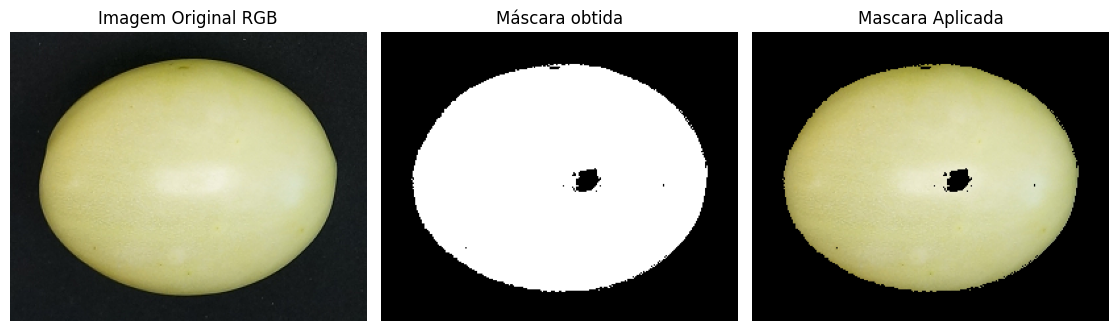

In [92]:
# 1. Carregar e converter a imagem
image = cv2.imread('./test_images/7(orig_dataset).bmp')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# Parâmetros para definir os limites dinâmicos
lower_saturation_value = 100  # Valor mínimo de saturação para considerar a região como tomate
lower_value_value = 150  # Valor mínimo de brilho para considerar a região como tomate
hue_std_dev = 3  # Desvio padrão para definir os limites dinâmicos

# 1. Calcular máscara inicial por saturação (onde o fundo branco ou cinza tem baixa saturação)
sat = image_hsv[:,:,1]
_, sat_mask = cv2.threshold(sat, lower_saturation_value, 255, cv2.THRESH_BINARY)

# 2. Aplicar máscara na imagem HSV para calcular Hue e Saturation apenas da região provável do tomate
masked_hsv = cv2.bitwise_and(image_hsv, image_hsv, mask=sat_mask)

hue = masked_hsv[:,:,0][sat_mask>0]
sat_values = masked_hsv[:,:,1][sat_mask>0]

# 3. Calcular estatísticas
hue_mean = np.mean(hue)
hue_std = np.std(hue)

sat_mean = np.mean(sat_values)
sat_std = np.std(sat_values)

# 4. Definir thresholds dinâmicos
lower_hue = int(max(0, hue_mean - hue_std_dev * hue_std))
upper_hue = int(min(179, hue_mean + hue_std_dev * hue_std))

lower_sat = int(max(0, sat_mean - hue_std_dev * sat_std))
upper_sat = int(min(255, sat_mean + hue_std_dev * sat_std))

# 5. Criar máscara final com base nesses limites
lower_bound = np.array([lower_hue, lower_sat, lower_value_value])
upper_bound = np.array([upper_hue, upper_sat, 255])

final_mask = cv2.inRange(image_hsv, lower_bound, upper_bound)

# 7. Aplicar máscara na imagem original
result = cv2.bitwise_and(image_rgb, image_rgb, mask=final_mask)

# Exibir resultados
plt.figure(figsize=(15, 10))

plt.subplot(1, 4, 1)
plt.imshow(image_rgb)
plt.title("Imagem Original RGB")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(final_mask, cmap='gray')
plt.title("Máscara obtida")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(result)
plt.title("Mascara Aplicada")
plt.axis('off')

plt.tight_layout()
plt.show()

# Passo 02: Limpar a máscara obtida com técnicas morfológicas e preencher a máscara através da detecção de contornos e refill.

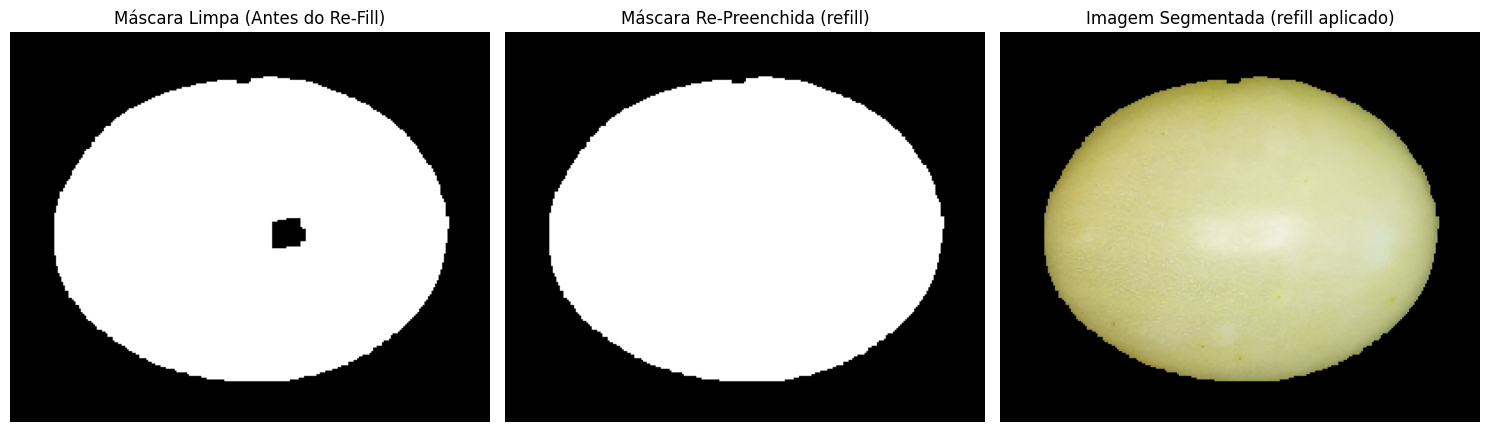

In [ ]:
# 5. Limpeza da máscara com morfologia
kernel = np.ones((7,7), np.uint8)
final_mask = cv2.morphologyEx(final_mask, cv2.MORPH_OPEN, kernel)
final_mask = cv2.morphologyEx(final_mask, cv2.MORPH_CLOSE, kernel)

# 6. Encontrar contornos
contours, _ = cv2.findContours(final_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 7. Criar nova máscara preenchida (refill)
refilled_mask = np.zeros_like(final_mask)
cv2.drawContours(refilled_mask, contours, -1, 255, thickness=cv2.FILLED)

# 8. Aplicar a máscara preenchida na imagem original
final_result = cv2.bitwise_and(image_rgb, image_rgb, mask=refilled_mask)

# Exibir os resultados
plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1)
plt.imshow(final_mask, cmap='gray')
plt.title("Máscara Limpa (Antes do Re-Fill)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(refilled_mask, cmap='gray')
plt.title("Máscara Re-Preenchida (refill)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(final_result)
plt.title("Imagem Segmentada")
plt.axis('off')

plt.tight_layout()
plt.show()


# Passo 03: Delimitar as regiões de Feature Color Extraction (FCA) para analisar a maturidade do tomate

Essas regiões de FCA são delimitadas por círculos concêntricos de mesma área apartir do centro do maior círculo circunscrito encontrado

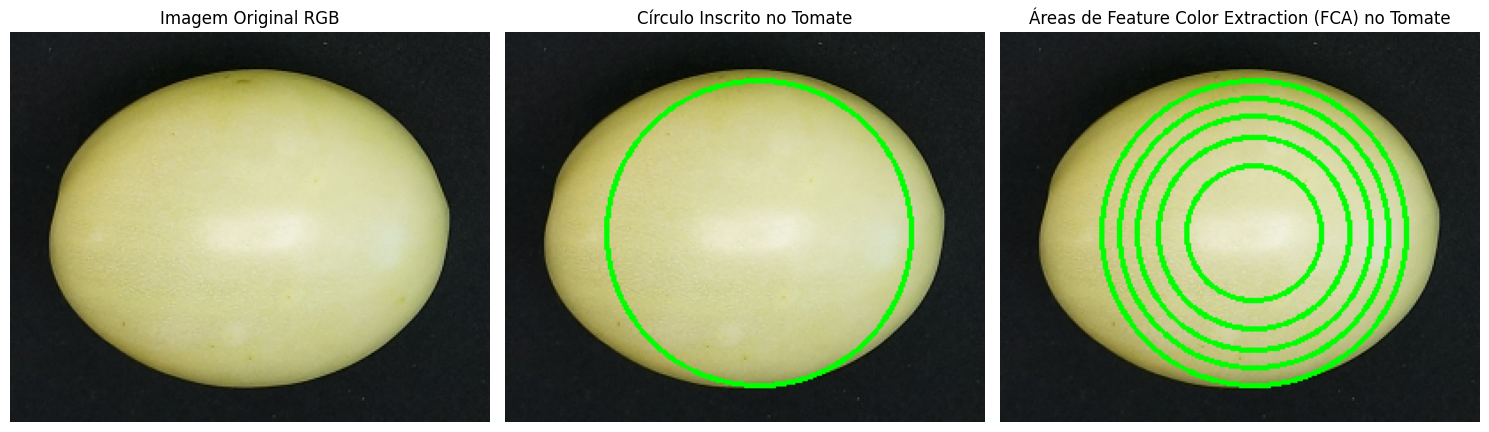

In [99]:
# 9. Limpeza da máscara com operações morfológicas
kernel = np.ones((10, 10), np.uint8)
mask_clean = cv2.morphologyEx(refilled_mask, cv2.MORPH_OPEN, kernel)
mask_clean = cv2.morphologyEx(mask_clean, cv2.MORPH_CLOSE, kernel)

# 10. Aplicar transformada de distância
dist_transform = cv2.distanceTransform(mask_clean, cv2.DIST_L2, 5)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(dist_transform)

# 11. Determinar o círculo inscrito
circle_center = maxLoc               # Centro do maior círculo
circle_radius = int(maxVal)          # Raio do maior círculo

# 12. Desenhar o círculo na imagem original
output = image_rgb.copy()
cv2.circle(output, circle_center, circle_radius, (0, 255, 0), 2)

# 13. Calcular os raios das 5 regiões com áreas iguais
radii = [int(np.sqrt(i/5) * circle_radius) for i in range(1, 6)]

# 14. Desenhar os 5 círculos concêntricos
output_circles = image_rgb.copy()
for r in radii:
    cv2.circle(output_circles, circle_center, r, (0, 255, 0), 2)

# Exibir resultados
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Imagem Original RGB")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(output)
plt.title("Círculo Inscrito no Tomate")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(output_circles)
plt.title("Áreas de Feature Color Extraction (FCA) no Tomate")
plt.axis('off')

plt.tight_layout()
plt.show()


# Passo 04: Cálculo das médias de cor por região FCA:

In [95]:
mean_colors_rgb = []
mean_colors_hsv = []

# 15. Extrair médias de cor de cada FCA
for i in range(5):
    # Criar máscara do círculo externo
    mask_outer = np.zeros_like(refilled_mask)
    cv2.circle(mask_outer, circle_center, radii[i], 255, thickness=cv2.FILLED)
    
    # Criar máscara do círculo interno (anterior)
    if i == 0:
        mask_inner = np.zeros_like(refilled_mask)
    else:
        mask_inner = np.zeros_like(refilled_mask)
        cv2.circle(mask_inner, circle_center, radii[i-1], 255, thickness=cv2.FILLED)
    
    # Máscara do anel atual: externo - interno
    ring_mask = cv2.subtract(mask_outer, mask_inner)
    
    # Limitar o anel apenas à área do tomate (intersecção com refilled_mask)
    ring_mask = cv2.bitwise_and(ring_mask, refilled_mask)

    # Calcular média RGB
    mean_rgb = cv2.mean(image_rgb, mask=ring_mask)[:3]  # Ignora alpha
    mean_colors_rgb.append(mean_rgb)
    
    # Calcular média HSV
    mean_hsv = cv2.mean(image_hsv, mask=ring_mask)[:3]
    mean_colors_hsv.append(mean_hsv)

# Mostrar resultados
print("Médias de cor por anel (RGB):")
for i, rgb in enumerate(mean_colors_rgb):
    print(f"FCA {i+1}: R={rgb[0]:.2f}, G={rgb[1]:.2f}, B={rgb[2]:.2f}")

print("\nMédias de cor por anel (HSV):")
for i, hsv in enumerate(mean_colors_hsv):
    print(f"FCA {i+1}: H={hsv[0]:.2f}, S={hsv[1]:.2f}, V={hsv[2]:.2f}")

Médias de cor por anel (RGB):
FCA 1: R=224.58, G=224.34, B=182.10
FCA 2: R=216.03, G=215.98, B=164.58
FCA 3: R=211.33, G=210.73, B=155.98
FCA 4: R=205.70, G=204.66, B=144.58
FCA 5: R=194.86, G=193.49, B=126.93

Médias de cor por anel (HSV):
FCA 1: H=29.77, S=48.95, V=224.98
FCA 2: H=30.03, S=61.57, V=216.76
FCA 3: H=29.83, S=67.72, V=212.07
FCA 4: H=29.83, S=77.01, V=206.53
FCA 5: H=29.65, S=90.85, V=195.85


### Visualização do resultado das médias de cores da FCA:

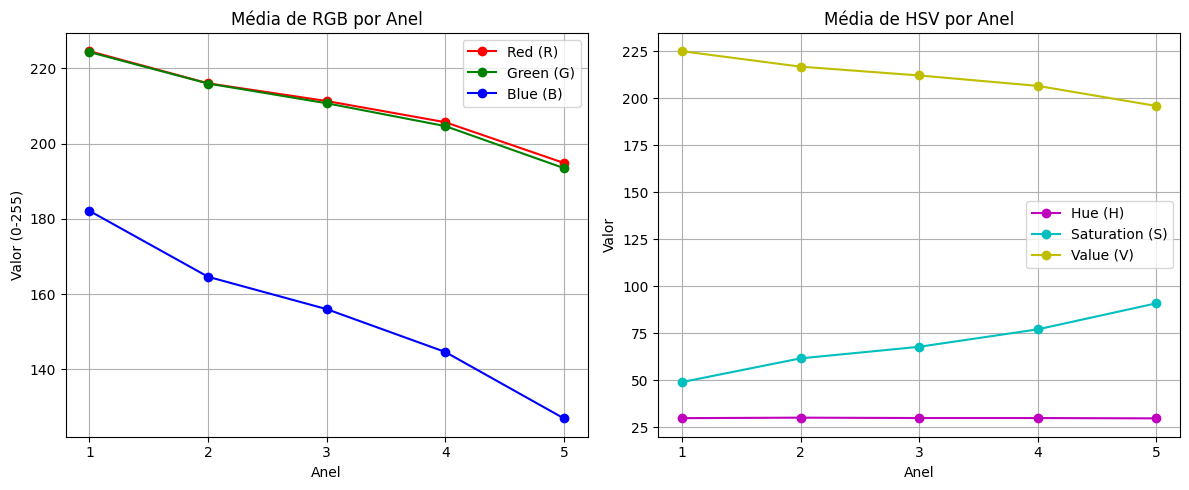

In [96]:
import matplotlib.pyplot as plt
import numpy as np

rings = np.arange(1, 6)

# Separação de cada componente RGB e HSV
R = [rgb[0] for rgb in mean_colors_rgb]
G = [rgb[1] for rgb in mean_colors_rgb]
B = [rgb[2] for rgb in mean_colors_rgb]

H = [hsv[0] for hsv in mean_colors_hsv]
S = [hsv[1] for hsv in mean_colors_hsv]
V = [hsv[2] for hsv in mean_colors_hsv]

plt.figure(figsize=(12,5))

# Plot RGB
plt.subplot(1, 2, 1)
plt.plot(rings, R, 'r-o', label='Red (R)')
plt.plot(rings, G, 'g-o', label='Green (G)')
plt.plot(rings, B, 'b-o', label='Blue (B)')
plt.title('Média de RGB por Anel')
plt.xlabel('Anel')
plt.ylabel('Valor (0-255)')
plt.xticks([1, 2, 3, 4, 5])
plt.legend()
plt.grid(True)

# Plot HSV
plt.subplot(1, 2, 2)
plt.plot(rings, H, 'm-o', label='Hue (H)')
plt.plot(rings, S, 'c-o', label='Saturation (S)')
plt.plot(rings, V, 'y-o', label='Value (V)')
plt.title('Média de HSV por Anel')
plt.xlabel('Anel')
plt.ylabel('Valor')
plt.xticks([1, 2, 3, 4, 5])
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


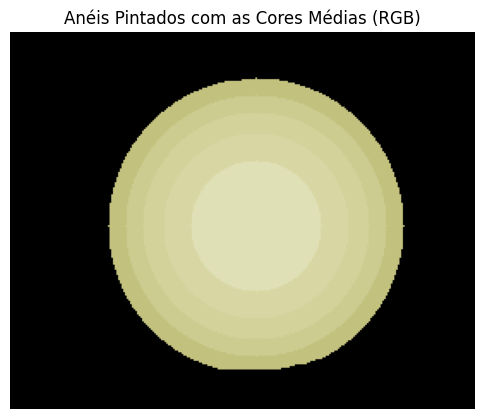

In [97]:
# Criar uma imagem em branco para mostrar os anéis coloridos
height, width = image_rgb.shape[:2]
visual = np.zeros((height, width, 3), dtype=np.uint8)

for i in range(5):
    # Máscara do anel
    mask_outer = np.zeros((height, width), dtype=np.uint8)
    cv2.circle(mask_outer, circle_center, radii[i], 255, thickness=cv2.FILLED)
    
    if i == 0:
        mask_inner = np.zeros((height, width), dtype=np.uint8)
    else:
        mask_inner = np.zeros((height, width), dtype=np.uint8)
        cv2.circle(mask_inner, circle_center, radii[i-1], 255, thickness=cv2.FILLED)
    
    ring_mask = cv2.subtract(mask_outer, mask_inner)
    ring_mask = cv2.bitwise_and(ring_mask, refilled_mask)

    # Pintar o anel com a cor média RGB
    color = tuple([int(c) for c in mean_colors_rgb[i]])
    visual[ring_mask > 0] = color

# Mostrar a visualização dos anéis coloridos
plt.figure(figsize=(6,6))
plt.imshow(visual)
plt.title("Anéis Pintados com as Cores Médias (RGB)")
plt.axis('off')
plt.show()


# Treinamento da Rede Neural Classificadora:

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.hidden = nn.Linear(5, 10)
        self.output = nn.Linear(10, 3)  # 3 classes

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.output(x)  # CrossEntropyLoss já aplica softmax internamente!
        return x

# Criando o modelo
model = NeuralNetwork()

# Função de perda para classificação multi-classe
criterion = nn.CrossEntropyLoss()

# Otimizador
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Exemplo de dados
X = torch.randn(100, 5)  # 100 amostras, 5 features
y = torch.randint(0, 3, (100,))  # 100 labels inteiros entre 0 e 2

# Treinamento
for epoch in range(500):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/500], Loss: {loss.item():.4f}')
